### Import Library

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Read Data

In [35]:
data_folder = "data/events.csv"
all_data  = pd.read_csv(data_folder, 
                  names=["Sequence", "time", "distance", "name"])
all_data=all_data.replace("-", np.nan) 
all_data=all_data.dropna()
all_data

,Sequence,time,distance,name
25,1,2022-11-05 23:08:01.000,198,Sheldon
26,1,2022-11-05 23:08:01.010,166,Sheldon
27,1,2022-11-05 23:08:01.020,138,Sheldon
28,1,2022-11-05 23:08:01.030,118,Sheldon
29,1,2022-11-05 23:08:01.040,92,Sheldon
...,...,...,...,...
8046,334,2022-11-13 22:34:39.110,96,Yourui
8047,334,2022-11-13 22:34:39.120,99,Yourui
8048,334,2022-11-13 22:34:39.130,102,Yourui
8049,334,2022-11-13 22:34:39.140,114,Yourui


### Data Exploration

In [36]:
data_len = len(all_data)
data_group = all_data.groupby("Sequence")
group_len = len(data_group)
min_height= all_data.groupby("Sequence").min()
min_height = min_height.drop("time",axis=1)
min_height = min_height.rename({"distance": "min_distance"},axis='columns')
print(min_height)
print(len(min_height))
min_height.groupby('name').size()


          min_distance     name
Sequence                       
1                   56  Sheldon
2                   55  Sheldon
3                   58  Sheldon
4                   83   Yourui
5                   90   Yourui
...                ...      ...
328                 91   Yourui
329                 61     Ally
330                 60     Ally
333                 97   Yourui
334                 96   Yourui

[275 rows x 2 columns]
275


name
Ally        33
Lucas       21
Sheldon     52
Yourui     169
dtype: int64

In [37]:
speed = all_data.groupby(["Sequence","name"]).count()
speed = speed.drop("time",axis=1)

speed = speed.rename({"distance":"speed"},axis='columns')
print(speed.groupby("name").mean())

             speed
name              
Ally     29.333333
Lucas    12.000000
Sheldon  29.326923
Yourui   23.662722


In [38]:
new_data=pd.merge(min_height, speed, on=["Sequence","name"])
print(new_data.tail())

          min_distance    name  speed
Sequence                             
328                 91  Yourui     20
329                 61    Ally     22
330                 60    Ally     26
333                 97  Yourui      1
334                 96  Yourui     16


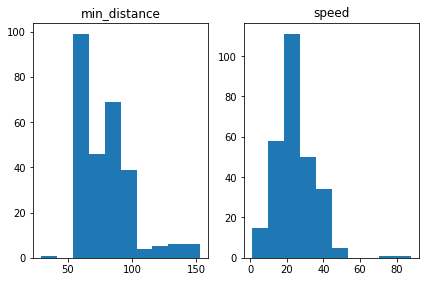

In [39]:
n_bins = 10
fig, axs = plt.subplots(1, 2)
axs[0].hist(new_data['min_distance'], bins = n_bins);
axs[0].set_title('min_distance');
axs[1].hist(new_data['speed'], bins = n_bins);
axs[1].set_title('speed');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

In [40]:
X = new_data[["min_distance","speed"]]
# print("* features:", X)
y = new_data["name"]
# print("Target:",y)

### Train and test data split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(len(y_train))
print(len(y_test))


206
69


## Model selection

### Decision Tree

In [42]:
# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


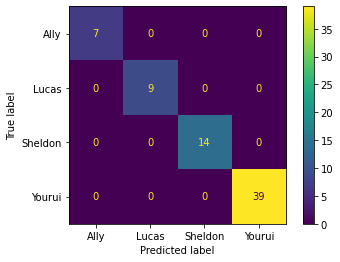

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree_model.classes_)
disp.plot()
plt.show()

In [44]:
print(dtree_predictions==y_test)

Sequence
149    True
226    True
262    True
190    True
255    True
       ... 
278    True
181    True
201    True
52     True
252    True
Name: name, Length: 69, dtype: bool


### KNN

In [45]:
k_range = range(1,26)

scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] =  metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))
     

Text(0, 0.5, 'Testing Accuracy')

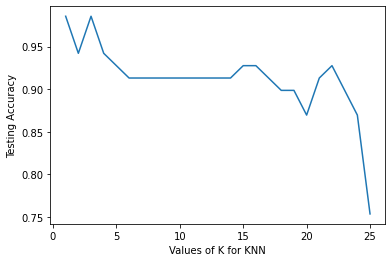

In [46]:
plt.plot(k_range,score_list)
plt.xlabel("Values of K for KNN")
plt.ylabel("Testing Accuracy")


In [47]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [48]:
y_predict = knn.predict(X_test)

In [49]:
print(y_predict[0])

Yourui


In [50]:
cm = confusion_matrix(y_test, y_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

In [ ]:
disp.plot()